<a href="https://colab.research.google.com/github/TDRobertson/CSC_5240_Email_Tone_and_Sentiment_Analysis/blob/main/CSC5240_Group12_Email_Tone_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# AI Final Project - Email Tone and Sentiment Analysis

## Authors: Thomas D. Robertson, Arefin Niam, Edward Gannod

## Instructions:
All of the code output should already be shown from our previous runs, if not simply run the Installing Required Dependencies section, restart the session, and then run all code blocks below Installing required dependencies.


This project integrates advanced AI tools to analyze emails for sentiment, tone, and potential grammatical issues. It provides dynamic tone feedback, visualizes trends, and leverages various pre-trained models.

## Tools and Libraries Used

This project uses a variety of libraries and tools for Natural Language Processing (NLP), sentiment analysis, and visualization. Below is a summary of the libraries used and their purposes:

- **Transformers (Hugging Face)**: Provides pre-trained models for sentiment analysis, emotion detection, sarcasm detection, and text summarization.
- **NLTK**: Traditional sentiment analysis using VADER lexicon-based rules.
- **TextBlob**: Offers simple text processing capabilities word correction.
- **SpaCy**: Advanced grammar checking and natural language understanding.
- **Matplotlib & Seaborn**: Visualization of emotion and sentiment trends.
- **textstat**: Computes Fletchs Readability Ease Score for sentence inputs.
- **language_tool_python**: Checks grammar and spelling.




### Installing Required Dependencies

In this section, we install all the necessary Python libraries. These libraries enable various functionalities such as sentiment analysis, emotion detection, text summarization, grammar checking, and data visualization.

- **Transformers**: For pre-trained NLP models.
- **NLTK**: Includes the VADER sentiment analyzer.
- **TextBlob**: Provides basic text processing capabilities.
- **SpaCy and SpaCy-Transformers**: For grammar checking and advanced NLP tasks.
- **Matplotlib and Seaborn**: Libraries for plotting and visualizing data.
- **textstat**: Computes readability scores for the text.
- **language_tool_python**: Grammar and spelling correction.

After installing these dependencies, restart the runtime and run all block cells below it to properly use the notebook.



In [1]:
import subprocess

def install(package):
    try:
        # Run the pip command
        result = subprocess.run(
            f'pip install {package} -q',  # Quiet mode
            shell=True,
            stdout=subprocess.PIPE,  # Capture stdout
            stderr=subprocess.PIPE   # Capture stderr
        )
        # Decode and filter out "Requirement already satisfied" messages
        output = result.stdout.decode('utf-8')
        filtered_output = "\n".join([line for line in output.split("\n") if "Requirement already satisfied" not in line])
        if filtered_output.strip():  # Print only if there's meaningful output
            print(filtered_output)
    except Exception as e:
        print(f"An error occurred while installing {package}: {e}")

# List of packages to install
packages = [
    "transformers",
    "nltk",
    "textblob",
    "textstat",
    "language-tool-python",
    "spacy",
    "spacy-transformers",
    "matplotlib",
    "seaborn",
    "peft",
    "sentence-transformers",
    "gTTs",
    'gtts',
    'opencv-python',
    'pillow',
    'torchvision'
]

!pip install opencv-python pillow torchvision matplotlib

# Install each package
for pkg in packages:
    install(pkg)

# Download spacy model
def download_spacy_model():
    try:
        # Run the spacy download command
        result = subprocess.run(
            'python -m spacy download en_core_web_trf',
            shell=True,
            stdout=subprocess.PIPE,  # Capture stdout
            stderr=subprocess.PIPE   # Capture stderr
        )
        # Decode and filter the output
        output = result.stdout.decode('utf-8')
        filtered_output = "\n".join([line for line in output.split("\n") if "Requirement already satisfied" not in line])
        if filtered_output.strip():  # Print meaningful output
            print(filtered_output)
    except Exception as e:
        print(f"An error occurred while downloading the spacy model: {e}")

# Download the model
download_spacy_model()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.2 MB/s eta 0:00:00

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.8/197.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.0/314.0 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 63.2 MB/s eta 0:00:00

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 60.1 MB/s eta 0:00:00

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.4/457.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.3/236.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7


## Importing Libraries

This section loads all the libraries required for our analysis.
- **NLTK** for traditional sentiment analysis.
- **SpaCy** for advanced grammar checking.
- **Transformers** from Hugging Face for modern NLP models (BERT, BART).
- **Matplotlib and Seaborn** for visualizing tone trends.


In [2]:

import nltk
from textblob import TextBlob
import language_tool_python
import spacy
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import textstat
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from peft import PeftModel, PeftConfig
import numpy
from collections import defaultdict
import warnings
from gtts import gTTS
from IPython.display import Audio

# Imports for computer vision
import cv2
from PIL import Image
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet18

warnings.filterwarnings("ignore", category=UserWarning, module="transformers")

# Load Pipelines and Models

In [3]:
# device = 0 at end for gpu support
emotion_pipeline = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", device=-1)
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", device =-1)
summarizer = pipeline("summarization", model="facebook/bart-large-cnn", device=-1)
sarcasm_pipeline = pipeline("text-classification", model="mrm8488/t5-base-finetuned-sarcasm-twitter", device=-1)



# Download necessary NLTK data files
nltk.download('vader_lexicon')
nltk.download('punkt')

# Load SpaCy transformer model
nlp = spacy.load("en_core_web_trf")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

Some weights of T5ForSequenceClassification were not initialized from the model checkpoint at mrm8488/t5-base-finetuned-sarcasm-twitter and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/thinc/shims/pytorch.py:253: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/mai

# Sender-Sided Solutions
## The goal of these two Methods is to provide various sender-side solutions in regards to analyzing the sentiment, tone, and sarcasm of emails being sent out in order to determine if any changes are needed.

## Method 1 - Tone, Sentiment, and Summary Generation


### Summary of Method 1

Method 1 offers a foundational approach to email tone and sentiment analysis. It primarily focuses on three key areas: basic grammar correction, sentiment classification, and summarization. The grammar checking component utilizes SpaCy’s natural language processing capabilities to make basic corrections, such as ensuring proper capitalization and structuring sentences. While it addresses common issues, the grammar analysis in this method remains relatively simple, focusing more on form rather than deeper grammatical errors.

For sentiment analysis, Method 1 leverages Hugging Face’s DistilBERT model to classify the email’s tone into Positive, Neutral, and Negative categories. This approach captures the general sentiment conveyed in the email using a context-aware language model, providing insight into how the content might be perceived emotionally.

Additionally, the method incorporates BART (Bidirectional and Auto-Regressive Transformers) for summarization, condensing the email into its core ideas. This summarization helps in quickly identifying the main points without needing to read through the entire text.

Finally, this method visualizes sentiment trends across multiple emails, offering a simple way to track the tone over time. While Method 1 provides a strong baseline for email analysis, it lacks advanced emotional profiling and does not account for nuances like sarcasm.



## Function Definitions

Here, we define the main functions for email analysis. Each function serves a specific purpose, from grammar checking to tone analysis and summarization.



### Advanced Grammar Check

This function uses the SpaCy library to perform advanced grammar checking on the email content. It works by:

1. **Tokenizing the email**: Breaks the text into individual words and punctuation marks.
2. **Identifying sentence boundaries**: Determines where each sentence starts and ends.
3. **Correcting capitalization**: Ensures the first word of every sentence is capitalized.

The corrected email is then returned as a single string.




In [4]:

def advanced_grammar_check(email_content):
    doc = nlp(email_content)
    corrections = [token.text.capitalize() if token.is_sent_start else token.text for token in doc]
    return " ".join(corrections)



### Dynamic Tone Analysis

This function utilizes the VADER rule-based sentiment analysis tool to assess the tone of the email. It provides the following outputs:

1. **Tone Scores**:
   - `neg`: Measures the negative sentiment in the email.
   - `neu`: Measures the neutral sentiment.
   - `pos`: Measures the positive sentiment.

2. **Tone Feedback**:
   - Suggests improvements based on the sentiment scores.
   - For example, it warns if the email may appear too negative or suggests adding more engaging language if the content is overly neutral.

The function returns both the tone scores and the feedback.



In [5]:
# Determines the tone of an email based off VADER lexicon-based sentiment score
def dynamic_tone_analysis(email_content):
    vader_analyzer = SentimentIntensityAnalyzer()
    tone_scores = vader_analyzer.polarity_scores(email_content)
    tone_feedback = []

    if tone_scores['neg'] > 0.5:
        tone_feedback.append("This email might come across as negative.")
    elif tone_scores['pos'] > 0.5:
        tone_feedback.append("This email conveys positivity.")
    if tone_scores['neu'] > 0.7:
        tone_feedback.append("Consider adding more engaging language.")

    return tone_scores, tone_feedback



### BERT Transformer based Sentiment Analysis

This function uses a BERT Transformer based model to classify the sentiment of the email into three categories: Negative, Neutral, and Positive. Here’s how it works:

1. **Tokenization**: Converts the input email text into a format that the BERT model can process.
2. **Model Prediction**: The pre-trained BERT model assigns probabilities to each sentiment category.
3. **Output**: Returns a dictionary mapping each sentiment label to its corresponding probability.

This method provides contextual sentiment analysis, capturing nuances in the text.



In [6]:
# Uses the BERT transformer model to contextualize the sentence tokens and then assign a value.
def bert_sentiment_analysis(text):
    tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
    model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    sentiment_scores = outputs.logits.softmax(dim=-1)
    labels = ["Negative", "Neutral", "Positive"]
    return dict(zip(labels, sentiment_scores[0].tolist()))


### Main Analysis Pipeline Function

This function integrates grammar correction, sentiment analysis, and summarization for a complete email analysis.


In [7]:
# Applies various pipeline methods to the email input.
def analyze_email(email_content):
    summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

    # Advanced grammar correction
    corrected_email = advanced_grammar_check(email_content)

    # Sentiment analysis (BERT and VADER)
    bert_sentiment = bert_sentiment_analysis(email_content)
    vader_tone_scores, vader_feedback = dynamic_tone_analysis(email_content)

    # Summary generation
    summary = summarizer(email_content, max_length=30, min_length=10, do_sample=False)

    return {
        "corrected_email": corrected_email,
        "bert_sentiment": bert_sentiment,
        "vader_tone_scores": vader_tone_scores,
        "vader_feedback": vader_feedback,
        "summary": summary[0]['summary_text']
    }



### Visualizing Tone Trends

This function uses Matplotlib and Seaborn to plot tone trends across multiple emails, helping to reveal patterns.


In [8]:
# Visualize VADER sentiment tone of supplied emails
def plot_tone_trends(emails):
    vader_analyzer = SentimentIntensityAnalyzer()
    tones = [vader_analyzer.polarity_scores(email) for email in emails]
    sentiments = ['Positive', 'Neutral', 'Negative']
    tone_intensities = [[t['pos'], t['neu'], t['neg']] for t in tones]

    plt.figure(figsize=(10, 6))
    sns.heatmap(tone_intensities, annot=True, xticklabels=sentiments, cmap="coolwarm", cbar=True)
    plt.xlabel("Tone Categories")
    plt.ylabel("Emails")
    plt.title("Tone Trends Across Emails")
    plt.show()



### Multiple Email Analysis and Visualization

Below, we demonstrate the use of our functions on sample email content and visualize tone trends across multiple emails.


--- Analysis for Email 1 ---


/usr/local/lib/python3.10/dist-packages/thinc/shims/pytorch.py:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(self._mixed_precision):


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


 
Corrected Email: Dear Team , 
 I hope this email finds you well . I wanted to express my gratitude for everyone ’s hard work over the past few weeks . Your dedication and commitment have not gone unnoticed . 
 Let ’s continue to push forward and ensure we meet our project milestones on time . Please let me know if there ’s anything I can do to support you in your efforts . 
 Kind regards , 
 [ Team Lead ]

BERT Sentiment Analysis: {'Negative': 0.2555001676082611, 'Neutral': 0.18417131900787354, 'Positive': 0.560328483581543}
VADER Tone Scores: {'neg': 0.018, 'neu': 0.672, 'pos': 0.311, 'compound': 0.9686}
Tone Feedback: []

Summary: I hope this email finds you well. I wanted to express my gratitude for everyone’s hard work over the past few weeks.


--- Analysis for Email 2 ---


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


 
Corrected Email: Dear [ Manager ’s Name ] , 
 Thank you so much for organizing yesterday ’s meeting . It was truly impressive to see how much time we spent reviewing the same points as last week without reaching any new conclusions . I appreciate the opportunity to listen to everyone ’s thoughts – again – on issues we ’ve already discussed multiple times . 
 It ’s always refreshing to attend meetings where decisions are avoided , and everyone leaves feeling as uncertain as they did beforehand . I look forward to the next one , where I ’m sure we ’ll make equally valuable progress . 
 Best regards , 
 [ Your Name ]

BERT Sentiment Analysis: {'Negative': 0.38837382197380066, 'Neutral': 0.2782575488090515, 'Positive': 0.3333686590194702}
VADER Tone Scores: {'neg': 0.056, 'neu': 0.667, 'pos': 0.277, 'compound': 0.9736}
Tone Feedback: []

Summary: It was truly impressive to see how much time we spent reviewing the same points as last week without reaching any new conclusions. It’


The fo

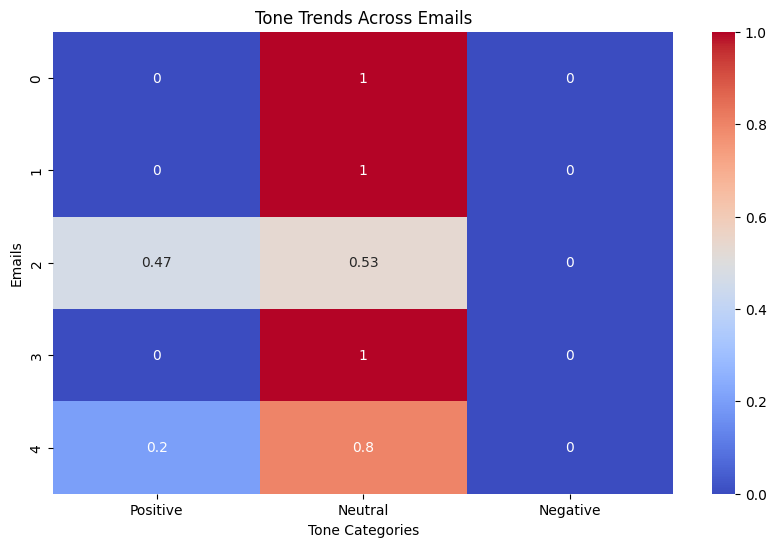

In [9]:

# Example email input
email_content = """
Dear Team,
I hope this email finds you well. I wanted to express my gratitude for everyone’s hard work over the past few weeks. Your dedication and commitment have not gone unnoticed.
Let’s continue to push forward and ensure we meet our project milestones on time. Please let me know if there’s anything I can do to support you in your efforts.
Kind regards,
[Team Lead]

---
Dear [Manager’s Name],
Thank you so much for organizing yesterday’s meeting. It was truly impressive to see how much time we spent reviewing the same points as last week without reaching any new conclusions. I appreciate the opportunity to listen to everyone’s thoughts – again – on issues we’ve already discussed multiple times.
It’s always refreshing to attend meetings where decisions are avoided, and everyone leaves feeling as uncertain as they did beforehand. I look forward to the next one, where I’m sure we’ll make equally valuable progress.
Best regards,
[Your Name]
"""

# Split emails by the delimiter (in this case, "---")
email_list = [email.strip() for email in email_content.split('---') if email.strip()]

# Function to analyze each email
for i, email in enumerate(email_list, 1):
    print(f"--- Analysis for Email {i} ---")
    results = analyze_email(email)
    print(" ")
    print("Corrected Email:", results.get('corrected_email', 'N/A'))
    print("\nBERT Sentiment Analysis:", results.get('bert_sentiment', 'N/A'))
    print("VADER Tone Scores:", results.get('vader_tone_scores', 'N/A'))
    print("Tone Feedback:", results.get('vader_feedback', 'N/A'))
    print("\nSummary:", results.get('summary', 'N/A'))
    print("\n")

# Example of trend visualization across multiple emails (0-4)
example_emails = [
    "Hi, everything is on track for the project.",
    "The delays are concerning, we need to address them.",
    "Great job on the recent update!",
    "The recent performance was not satisfactoryy.",
    "It would be nice if we could get some actual work done."
]
print("The following graph displays the simplified (VADER) analysis of an email input list and graphs the emotional content")
# Plot the list of email trends into a graph
plot_tone_trends(example_emails)



# Method 2 - Combination of analytics method for creation of end-to-end solution

### Summary of Method 2

Method 2 takes a more comprehensive and nuanced approach to email analysis by integrating multiple advanced tools and techniques. It starts with grammar correction using the `language_tool_python` library, which provides detailed feedback on grammar and spelling errors. Unlike the basic grammar corrections in Method 1, this method identifies a wider range of issues, such as incorrect verb usage, punctuation, and stylistic inconsistencies, and applies rule-based fixes.

Emotion detection in Method 2 goes beyond basic sentiment classification. Using Hugging Face’s RoBERTa-based model, it identifies a broad spectrum of emotions, including happiness, sadness, anger, and surprise, providing a detailed emotional profile for the email. Each emotion is scored with a confidence level, enabling a deeper understanding of the email's tone.

A standout feature of Method 2 is its sarcasm detection. Combining heuristic rules with a pre-trained Hugging Face sarcasm model, it can identify sarcastic undertones in the text. This dual approach ensures that even subtle sarcasm, often missed by traditional sentiment analysis, is captured.

The sentiment analysis component combines the strengths of two models: VADER for rule-based sentiment scoring and Hugging Face BERT for context-aware sentiment analysis. By blending these scores, Method 2 achieves a more balanced and robust sentiment evaluation.

Summarization continues to use the BART model but is more tightly integrated within the analysis pipeline, ensuring that key insights from the email are concisely presented.

Finally, Method 2 offers dynamic bar charts that display both emotional tones and sarcasm levels, along with annotations for detected sarcastic phrases. This makes the analysis results not only comprehensive but also easily interpretable, facilitating better decision-making based on the email's content and tone.


### Grammar Checking with language_tool_python

This function checks for grammatical errors in the email using the `language_tool_python` library. Here's how it works:

1. **Grammar Checking**: It scans the email for potential grammar issues, such as incorrect verb forms, punctuation errors, or spelling mistakes.
2. **Correction Application**: It automatically applies corrections to the detected errors.
3. **Output**:
   - Returns the corrected email content.
   - Provides a list of grammar issues found.

This ensures that the email is grammatically correct before proceeding with further analysis.


In [10]:
# Check for incorrect Grammar in input email
def grammar_check(email_content):
    tool = language_tool_python.LanguageTool('en-US')
    matches = tool.check(email_content)
    corrected_email = language_tool_python.utils.correct(email_content, matches)
    return corrected_email, matches


### Hugging Face Transformers Emotion Detection  

This function uses a pre-trained transformer model to detect emotions in the email. Key steps include:

1. **Emotion Classification**:
   - The model assigns scores to different emotions such as happiness, sadness, anger, etc.
2. **Output**:
   - Returns a list of emotions with their corresponding confidence scores.

This provides a deeper understanding of the emotional tone conveyed by the email.


In [11]:
# Emotion Detection using Hugging Face Transformers
def emotion_detection(email_content):
    # Use a pre-trained emotion detection model
    emotion_pipeline = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)
    emotions = emotion_pipeline(email_content)
    return emotions


## gTTs Text-to-Speech integration
Function to convert text to speech and save it to a file for use in the notebook.

In [12]:
# Define the text_to_speech_gtts function
def text_to_speech_gtts(text, filename):
    """Converts text to speech using gTTS and saves to an MP3 file."""
    tts = gTTS(text=text, lang='en')  # 'en' for English
    tts.save(filename)

### VADER Sentiment Analysis

The `VADER` tool performs sentiment analysis on the email content. Key aspects:

1. **Sentiment Scores**:
   - `neg`: Negative sentiment score.
   - `neu`: Neutral sentiment score.
   - `pos`: Positive sentiment score.
   - `compound`: A normalized score summarizing the overall sentiment.
2. **Output**:
   - Provides an overall sentiment profile for the email.

This function captures both polarity and intensity of sentiment using a lexicon-based approach.


In [13]:
# VADER Sentiment Analysis
def sentiment_analysis_vader(email_content):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(email_content)



### BERT Sentiment Analysis

This function utilizes the Hugging Face `BERT` model for advanced sentiment analysis. Key points:

1. **Tokenization**:
   - Converts the email text into tokens that the BERT model can process.
2. **Sentiment Prediction**:
   - Provides probabilities for `Positive`, `Neutral`, and `Negative` sentiments.
3. **Output**:
   - Returns a dictionary mapping each sentiment label to its respective score.

This adds contextual depth to sentiment analysis.


In [14]:
# BERT Sentiment Analysis
def sentiment_analysis(email_content):
    sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
    sentiment = sentiment_pipeline(email_content)
    return sentiment

### Heuristic Sarcasm Detection

This function detects sarcasm in the email using rule-based heuristics. Key steps:

1. **Phrase Detection**:
   - Searches for predefined sarcastic phrases (e.g., "valuable progress").
2. **Confidence Assignment**:
   - Assigns a higher confidence score if sarcastic phrases are detected.
3. **Output**:
   - Indicates whether sarcasm is detected and lists the phrases contributing to it.

It complements the model-based sarcasm detection by using human-crafted rules.


In [15]:
# Heuristic Function to use rule-based approach to check for slightly sarcastic understones in emails
def heuristic_sarcasm_check(email_content):
    sarcastic_phrases = [
        "valuable progress",
        "refreshing",
        "impressive time spent",
        "as expected",
        "great job repeating",
        "looking forward to similar results"
    ]

    # Check for any sarcastic phrase in the email
    detected_phrases = [phrase for phrase in sarcastic_phrases if phrase in email_content.lower()]
    sarcasm_confidence = 0.7 if detected_phrases else 0.3  # Assign higher confidence if phrases are found
    return {
        "heuristic_detected": bool(detected_phrases),
        "phrases": detected_phrases,
        "score": sarcasm_confidence
    }


### Hugging Face Sarcasm Detection

This function leverages a pre-trained Hugging Face model for sarcasm detection:

1. **Model Prediction**:
   - Classifies the email as `SARCASM` or `NOT_SARCASM`.
2. **Heuristic Integration**:
   - Combines model output with heuristic results for enhanced accuracy.
3. **Output**:
   - Returns the sarcasm label, score, and heuristic phrases.

It provides a robust mechanism for sarcasm detection by combining model and rule-based approaches.

In [16]:
# Hugging Face Sarcasm Detection with built in heuristics
def detect_sarcasm_with_heuristics(email_content):
    # First, use the sarcasm model
    sarcasm_result = sarcasm_pipeline(email_content)[0]

    # Run heuristic sarcasm detection
    heuristic_result = heuristic_sarcasm_check(email_content)

    # Combine results: take the max score if heuristics detect sarcasm
    combined_score = max(sarcasm_result['score'], heuristic_result['score'])
    is_sarcastic = sarcasm_result['label'] == 'LABEL_1' or heuristic_result['heuristic_detected']

    return {
        "label": "SARCASM" if is_sarcastic else "NOT_SARCASM",
        "score": combined_score,
        "heuristic_phrases": heuristic_result['phrases']
    }


### BART Summarization of Input Email

This function summarizes the email content using the `BART` model:

1. **Summarization**:
   - Compresses the content to highlight key points.
2. **Output**:
   - Provides a concise summary of the email.

This helps in quickly understanding the main ideas without reading the entire email.


In [17]:
# Bart Summarization
def summarize_email(email_content):
    summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
    summary = summarizer(email_content, max_length=30, min_length=10, do_sample=False)
    return summary[0]['summary_text']

### Readability Analysis

This function evaluates the readability of the email using `textstat`:

1. **Readability Score**:
   - Computes the Flesch Reading Ease score.
   - Higher scores indicate easier-to-read content.
2. **Output**:
   - Returns a numerical readability score.

This helps gauge how easy the email is to read and comprehend based upon the Flesch Reading Ease Score. The scores symbolize the grade level needed to read something. With a higher score being easier to read.

(Source: https://www.morainepark.edu/help/what-flesch-reading-ease-score-should-my-content-have/)

Scores:

100 - 90 = 5th grade

90 - 80 = 6th grade

80 - 70 = 7th grade

70 - 60 = 8th and 9th grade

60 - 50 = 10th to 12th grade

50 - 30 = College

30 - 10 = College Graduate

10 - 0 = Professional


In [18]:
# Calculate the Flesch Reading Ease Score of email input
def readability_analysis(email_content):
    score = textstat.flesch_reading_ease(email_content)
    return score


### Combined Sentiment Scores from BERT and VADER

This function combines sentiment results from BERT and VADER for a balanced analysis:

1. **Score Normalization**:
   - Adjusts the VADER compound score to a 0–1 range.
2. **Weighted Combination**:
   - Calculates a weighted average of sentiment scores from both models.
3. **Final Sentiment**:
   - Determines if the overall sentiment is Positive or Negative.

This approach leverages the strengths of both contextual and lexicon-based models.

In [19]:
def combine_sentiment_scores(bert_sentiment, vader_tone_scores, bert_weight=0.6, vader_weight=0.4):
    # Normalize VADER compound score to [0, 1]
    vader_score_normalized = (vader_tone_scores['compound'] + 1) / 2  # Range [0, 1]

    # Safely extract BERT positive/negative probabilities with default values if missing
    bert_positive = next((score['score'] for score in bert_sentiment if score['label'].upper() == "POSITIVE"), 0.5)
    bert_negative = next((score['score'] for score in bert_sentiment if score['label'].upper() == "NEGATIVE"), 0.5)

    # Combined sentiment score (weighted average)
    combined_positive = bert_weight * bert_positive + vader_weight * vader_score_normalized
    combined_negative = bert_weight * bert_negative + vader_weight * (1 - vader_score_normalized)

    # Determine final sentiment based on the combined scores
    final_sentiment = "Positive" if combined_positive > combined_negative else "Negative"

    return {
        "combined_positive": combined_positive,
        "combined_negative": combined_negative,
        "final_sentiment": final_sentiment
    }


### Adjust Combined Sentiment for Sarcasm

This function adjusts sentiment scores based on sarcasm detection:

1. **Positive Sentiment Reduction**:
   - Reduces positive sentiment if sarcasm is detected.
2. **Negative Sentiment Boost**:
   - Increases negative sentiment to reflect sarcastic undertones.
3. **Output**:
   - Returns adjusted sentiment scores and flags if sarcasm adjustments were applied.

It ensures sentiment analysis accounts for sarcastic tones.


In [20]:
# 9. Adjust Combined Sentiment for Sarcasm
def adjust_for_sarcasm(combined_sentiment, sarcasm_result):
    if sarcasm_result['label'] == 'SARCASM' and sarcasm_result['score'] > 0.6:
        # Adjust sentiment scores to reflect sarcasm
        combined_sentiment['combined_positive'] *= 0.5  # Reduce positive sentiment by 50%
        combined_sentiment['combined_negative'] += 0.3  # Increase negative sentiment
        if combined_sentiment['combined_negative'] > 1:
            combined_sentiment['combined_negative'] = 1  # Cap at 1

        combined_sentiment['final_sentiment'] = "Negative"
        combined_sentiment['sarcasm_adjusted'] = True
    else:
        combined_sentiment['sarcasm_adjusted'] = False

    return combined_sentiment



### Combination Methods Analysis Pipeline

This function integrates all the previously defined steps:

1. **Preprocessing**:
   - Corrects grammar and evaluates readability.
2. **Analysis**:
   - Detects emotions, sentiment, and sarcasm.
3. **Summarization**:
   - Provides a summary of the email content.
4. **Output**:
   - Returns a comprehensive analysis result, including all computed metrics.

This serves as the primary workflow for analyzing emails to determine their sentiment analysis and sarcasm score.


In [21]:
def analyze_email(email_content):
    # Grammar and spelling correction
    corrected_email, grammar_issues = grammar_check(email_content)

    # Emotion detection
    emotions = emotion_detection(corrected_email)

    # Sentiment analysis (BERT and VADER)
    vader_tone_scores = sentiment_analysis_vader(corrected_email)
    bert_sentiment = sentiment_analysis(corrected_email)

    # Sarcasm detection
    sarcasm_result = detect_sarcasm_with_heuristics(corrected_email)

    # Combine BERT and VADER sentiment scores
    combined_sentiment = combine_sentiment_scores(bert_sentiment, vader_tone_scores)
    # Adjust for Sarcasm Evaluation
    combined_sentiment = adjust_for_sarcasm(combined_sentiment, sarcasm_result)

    # Readability score
    readability_score = readability_analysis(corrected_email)

    # Email summarization
    summary = summarize_email(corrected_email)

    return {
        "corrected_email": corrected_email,
        "grammar_issues": grammar_issues,
        "emotions": emotions,
        "bert_sentiment": bert_sentiment,
        "vader_tone_scores": vader_tone_scores,
        "sarcasm_result": sarcasm_result,
        "combined_sentiment": combined_sentiment,
        "readability_score": readability_score,
        "summary": summary
    }

### Visualization of Detected Emotions and Sarcasm

This function visualizes the emotional tone and sarcasm level of the email:

1. **Bar Chart**:
   - Displays scores for each emotion in the email.
2. **Sarcasm Indicator**:
   - Adds a separate bar for sarcasm with a distinct color.
3. **Annotations**:
   - Highlights heuristic phrases contributing to sarcasm detection.

It provides a clear visual representation of the email's emotional and sarcastic tone.


In [22]:
def visualize_emotions_and_sarcasm(emotions_result, sarcasm_result):
    import matplotlib.pyplot as plt
    import numpy as np

    # Extract emotion data
    emotions = {emotion['label']: emotion['score'] for emotion in emotions_result[0]}
    sarcasm_score = sarcasm_result['score']
    heuristic_phrases = sarcasm_result['heuristic_phrases']

    # Create bar chart for emotions
    plt.figure(figsize=(10, 6))
    emotion_names = list(emotions.keys())
    emotion_values = list(emotions.values())
    bars = plt.bar(emotion_names, emotion_values, color='skyblue', label='Emotions')

    # Add sarcasm as a separate bar
    plt.bar('Sarcasm', sarcasm_score, color='orange', label='Sarcasm', alpha=0.8)

    # Annotate bars
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{bar.get_height():.2f}', ha='center', fontsize=10)

    # Annotate sarcasm bar
    plt.text(len(emotion_names), sarcasm_score + 0.02, f'{sarcasm_score:.2f}', ha='center', fontsize=10)

    # Display heuristic phrases
    if heuristic_phrases:
        plt.text(len(emotions) - 1, max(emotion_values) + 0.1, f"Heuristic Phrases: {', '.join(heuristic_phrases)}",
                 fontsize=12, color='darkred', ha='right')

    # Customize plot
    plt.title('Emotion Analysis with Sarcasm Detection')
    plt.ylabel('Scores')
    plt.ylim(0, 1)
    plt.legend()
    plt.show()




--- Analysis for Email 1 ---



INFO:language_tool_python.download_lt:Unzipping /tmp/tmpr9dueiif.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://www.languagetool.org/download/LanguageTool-6.4.zip to /root/.cache/language_tool_python.



Grammar Issues:
 []

Corrected Email:
 Dear Team,
I hope this email finds you well. I wanted to express my gratitude for everyone’s hard work over the past few weeks. Your dedication and commitment have not gone unnoticed.
Let’s continue to push forward and ensure we meet our project milestones on time. Please let me know if there’s anything I can do to support you in your efforts.
Kind regards,
[Team Lead]

Emotions:
anger: 0.01
disgust: 0.01
fear: 0.00
joy: 0.20
neutral: 0.73
sadness: 0.02
surprise: 0.04

BERT Sentiment:
 [{'label': 'POSITIVE', 'score': 0.9997188448905945}]

VADER Tone Scores:
 {'neg': 0.018, 'neu': 0.672, 'pos': 0.311, 'compound': 0.9686}

Sarcasm Detection Result:
 {'label': 'SARCASM', 'score': 0.5367316007614136, 'heuristic_phrases': []}

Heuristic Phrases Detected:
 []

Combined Sentiment:
 {'combined_positive': 0.9935513069343567, 'combined_negative': 0.30628, 'final_sentiment': 'Positive', 'sarcasm_adjusted': False}

Readability Score:
 85.69

Summary:
 I hope

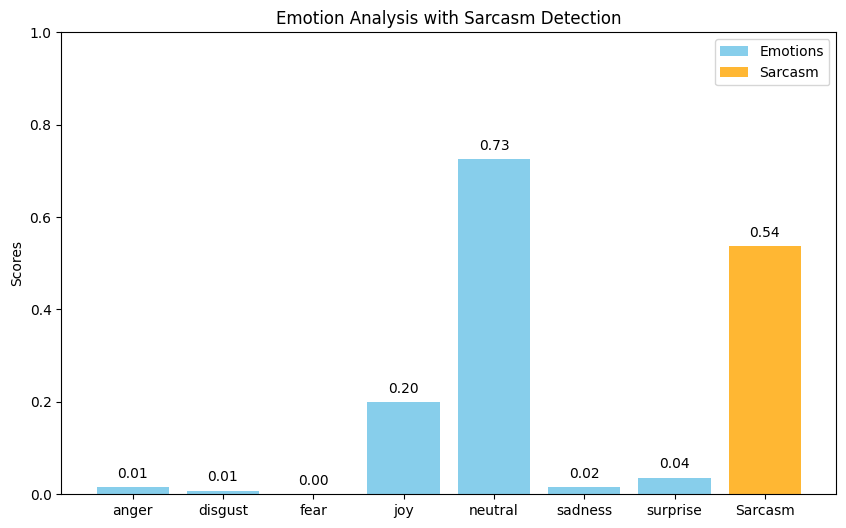

Audio Feedback for Email 1: Email 1 has an appropriate tone. No major issues detected.





--- Analysis for Email 2 ---


Grammar Issues:
 []

Corrected Email:
 Dear [Manager’s Name],
Thank you so much for organizing yesterday’s meeting. It was truly impressive to see how much time we spent reviewing the same points as last week without reaching any new conclusions. I appreciate the opportunity to listen to everyone’s thoughts – again – on issues we’ve already discussed multiple times.
It’s always refreshing to attend meetings where decisions are avoided, and everyone leaves feeling as uncertain as they did beforehand. I look forward to the next one, where I’m sure we’ll make equally valuable progress.
Best regards,
[Your Name]

Emotions:
anger: 0.00
disgust: 0.00
fear: 0.83
joy: 0.06
neutral: 0.08
sadness: 0.01
surprise: 0.01

BERT Sentiment:
 [{'label': 'POSITIVE', 'score': 0.9995730519294739}]

VADER Tone Scores:
 {'neg': 0.056, 'neu': 0.667, 'pos': 0.277, 'compound': 0.9736}

Sarcasm Detection Result:
 {'label': 'SARCASM', 'score': 0.7, 'heuristic_phrases': ['valuable

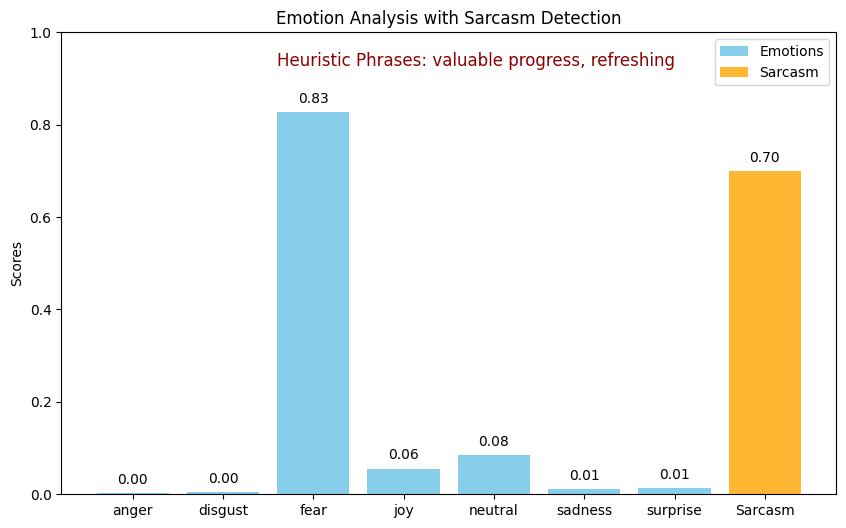

Audio Feedback for Email 2: Email 2 contains sarcasm. Consider rephrasing for clarity and professionalism.





--- Analysis for Email 3 ---


Grammar Issues:
 [Match({'ruleId': 'MORFOLOGIK_RULE_EN_US', 'message': 'Possible spelling mistake found.', 'replacements': ['Manager', 'Man agar'], 'offsetInContext': 6, 'context': 'Dear [Managar’s Nam] Thnk you so much for organzing y...', 'offset': 6, 'errorLength': 7, 'category': 'TYPOS', 'ruleIssueType': 'misspelling', 'sentence': "Dear [Managar's Nam]\nThnk you so much for organzing yesturday's meting."}), Match({'ruleId': 'MORFOLOGIK_RULE_EN_US', 'message': 'Possible spelling mistake found.', 'replacements': ['Tank', 'Think', 'Thank', 'TNK', 'Thunk'], 'offsetInContext': 21, 'context': 'Dear [Managar’s Nam] Thnk you so much for organzing yesturday’s m...', 'offset': 21, 'errorLength': 4, 'category': 'TYPOS', 'ruleIssueType': 'misspelling', 'sentence': "Dear [Managar's Nam]\nThnk you so much for organzing yesturday's meting."}), Match({'ruleId': 'MORFOLOGIK_RULE_EN_US', 'message': 'Possible spelling mistake found.', 'replacements': ['organizing', '

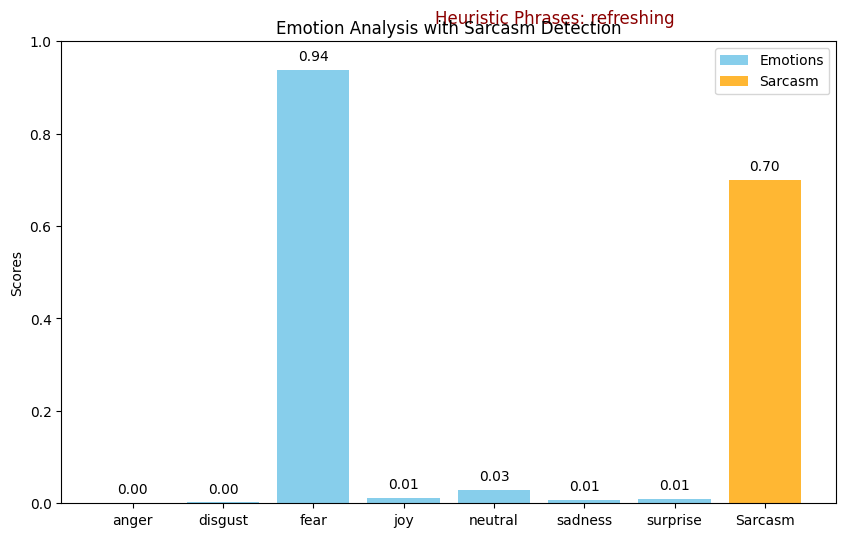

Audio Feedback for Email 3: Email 3 contains sarcasm. Consider rephrasing for clarity and professionalism.





--- Analysis for Email 4 ---


Grammar Issues:
 [Match({'ruleId': 'MORFOLOGIK_RULE_EN_US', 'message': 'Possible spelling mistake found.', 'replacements': [], 'offsetInContext': 5, 'context': "Dear thingawahtit's Me am very glad to meet you there tod...", 'offset': 5, 'errorLength': 12, 'category': 'TYPOS', 'ruleIssueType': 'misspelling', 'sentence': "Dear thingawahtit's\nMe am very glad to meet you there todat."}), Match({'ruleId': 'MORFOLOGIK_RULE_EN_US', 'message': 'Possible spelling mistake found.', 'replacements': ['today'], 'offsetInContext': 43, 'context': "...tit's Me am very glad to meet you there todat. No happy when not see or can alkjsedn....", 'offset': 54, 'errorLength': 5, 'category': 'TYPOS', 'ruleIssueType': 'misspelling', 'sentence': "Dear thingawahtit's\nMe am very glad to meet you there todat."}), Match({'ruleId': 'MORFOLOGIK_RULE_EN_US', 'message': 'Possible spelling mistake found.', 'replacements': ['aliased'], 'offsetInContext': 43, 'context': '...ere todat. No

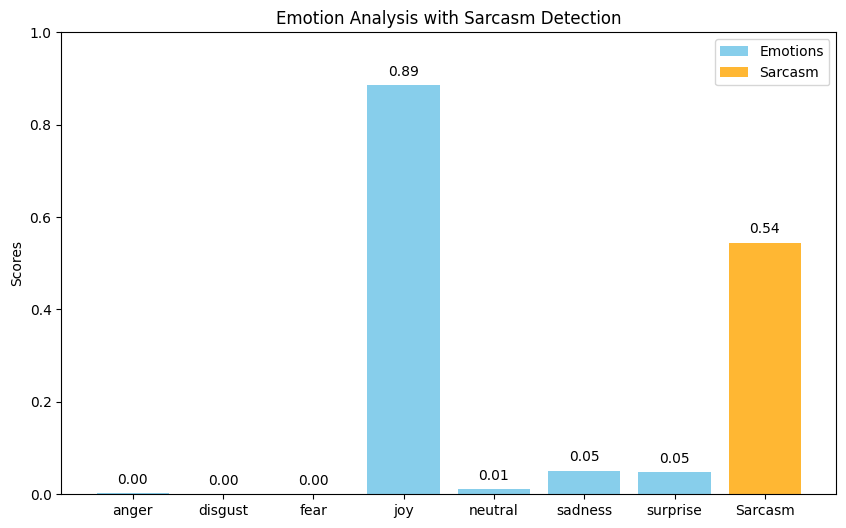

Audio Feedback for Email 4: Email 4 has an appropriate tone. No major issues detected.


In [23]:
# Example email input with multiple emails separated by a delimiter
email_content = """
Dear Team,
I hope this email finds you well. I wanted to express my gratitude for everyone’s hard work over the past few weeks. Your dedication and commitment have not gone unnoticed.
Let’s continue to push forward and ensure we meet our project milestones on time. Please let me know if there’s anything I can do to support you in your efforts.
Kind regards,
[Team Lead]

---
Dear [Manager’s Name],
Thank you so much for organizing yesterday’s meeting. It was truly impressive to see how much time we spent reviewing the same points as last week without reaching any new conclusions. I appreciate the opportunity to listen to everyone’s thoughts – again – on issues we’ve already discussed multiple times.
It’s always refreshing to attend meetings where decisions are avoided, and everyone leaves feeling as uncertain as they did beforehand. I look forward to the next one, where I’m sure we’ll make equally valuable progress.
Best regards,
[Your Name]
---
Dear [Managar’s Nam]
Thnk you so much for organzing yesturday’s meting. It was truely impresive to seen how much tyme we spend revewing the same pionts as last week without reching any new conclushions. I apreciate the oportunity to lisening to evryones thoghts - agian - on isues we’ve alredy discused multiple timez.
Its allways refreshing to atend metings where decisons are avioded, and evryone leavs feelling as unsertain as they did beforhand. I look foward to the next one, where I’m sure we’ll make equaly valueble progess.
Best reguards,
[Your Nam]
---
Dear thingawahtit's
Me am very glad to meet you there todat. No happy when not see or can alkjsedn.
Nex tim we goo to hockey ball pen. And we r sup happi
wit luv,
Smeckledorf
"""

# Split emails by the delimiter (in this case, "---")
email_list = [email.strip() for email in email_content.split('---') if email.strip()]

# Function to analyze each email
for i, email in enumerate(email_list, 1):
    print(f"\n--- Analysis for Email {i} ---\n")
    results = analyze_email(email)  # Call the analysis function for each email

    # Display the results for the current email
    print("\nGrammar Issues:\n", results["grammar_issues"])
    print("\nCorrected Email:\n", results["corrected_email"])
    print("\nEmotions:")
    for emotion in results["emotions"][0]:
        print(f"{emotion['label']}: {emotion['score']:.2f}")
    print("\nBERT Sentiment:\n", results["bert_sentiment"])
    print("\nVADER Tone Scores:\n", results["vader_tone_scores"])
    print("\nSarcasm Detection Result:\n", results["sarcasm_result"])
    print("\nHeuristic Phrases Detected:\n", results["sarcasm_result"]["heuristic_phrases"])
    print("\nCombined Sentiment:\n", results["combined_sentiment"])
    print("\nReadability Score:\n", results["readability_score"])
    print("\nSummary:\n", results["summary"])

    print("\nGraph of the Emotion and Sarcasm Analysis of email inputs\n")
    # Visualize Emotions and Sarcasm for the current email
    visualize_emotions_and_sarcasm(results["emotions"], results["sarcasm_result"])

    # Generate audio feedback based on tone
    feedback_audio = None
    if results['vader_tone_scores']['compound'] < -0.2:
        feedback_text = f"Email {i} has a negative tone. Consider revising the wording to make it more positive."
        feedback_audio = f"negative_feedback_{i}.mp3"
    # Check if sarcasm was detected based on the 'score'
    elif results['sarcasm_result']['score'] >= 0.7:  # Adjust threshold as needed
        feedback_text = f"Email {i} contains sarcasm. Consider rephrasing for clarity and professionalism."
        feedback_audio = f"sarcasm_feedback_{i}.mp3"
    else:
        feedback_text = f"Email {i} has an appropriate tone. No major issues detected."
        feedback_audio = f"neutral_feedback_{i}.mp3"

    print(f"Audio Feedback for Email {i}: {feedback_text}")
    text_to_speech_gtts(feedback_text, feedback_audio)

    # Play the feedback audio
    display(Audio(feedback_audio, autoplay=True))
    print("\n")

# Method 3 - Implementation of Solutions
This method continues upon the analytic work of Method 2 and provides feedback for sentence restructuring upon detection of sarcasm or ambiguity within sentences.

## Implementation of Sender side email solutions for email restructuring
Determine if an email needs to be restructured due to potentially high sarcastic tone contained within input emails.

The following functions analyze the email inputs for sarcastic or ambiguous sentences, it also compares the email inputs against pre-defined heuristic scores to determine sarcasm content of the email.

This is accomplished by tokenizing each sentence in the email input and checking for pre-defined values to replace.


In [24]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import defaultdict
import warnings

import logging
logging.getLogger("transformers.modeling_utils").setLevel(logging.ERROR)


# Suppress unnecessary warnings
warnings.filterwarnings("ignore", category=UserWarning, module="transformers")

# Download required NLTK models
nltk.download('punkt')
nltk.download('punkt_tab')

sia = SentimentIntensityAnalyzer()

def tokenize_email(email_content):
    return sent_tokenize(email_content)


def analyze_sentences(sentences):
    results = []
    for sentence in sentences:
        sentiment = sia.polarity_scores(sentence)
        results.append((sentence, sentiment))
    return results

def heuristic_sarcasm_check(email_content):
    sarcastic_phrases = [
        "valuable progress", "refreshing", "impressive time spent",
        "as expected", "great job repeating", "looking forward to similar results"
    ]
    detected_phrases = [phrase for phrase in sarcastic_phrases if phrase in email_content.lower()]
    sarcasm_confidence = 0.7 if detected_phrases else 0.3  # Assign higher confidence if phrases are found
    return {
        "heuristic_detected": bool(detected_phrases),
        "phrases": detected_phrases,
        "score": sarcasm_confidence
    }

def detect_sarcasm_with_heuristics(email_content):
    """Detects sarcasm using a pre-trained Hugging Face model and heuristic methods."""
    sarcasm_pipeline = pipeline(
        "text-classification",
        model="mrm8488/t5-base-finetuned-sarcasm-twitter",
        device=-1  # Use CPU
    )

    sarcasm_result = sarcasm_pipeline(email_content)[0]
    heuristic_result = heuristic_sarcasm_check(email_content)

    combined_score = max(sarcasm_result['score'], heuristic_result['score'])
    is_sarcastic = sarcasm_result['label'] == 'LABEL_1' or heuristic_result['heuristic_detected']

    return {
        "label": "SARCASM" if is_sarcastic else "NOT_SARCASM",
        "score": combined_score,
        "heuristic_phrases": heuristic_result['phrases']
    }



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


### Generate suggestions if negative email detected
Generate suggestions for emails containing negative content.

In [25]:
def suggest_restructuring(sentences, sentiment_results, sarcasm_results, negative_threshold=0.5, sarcasm_threshold=0.7):
    """Generates restructuring suggestions for sentences with negative sentiment or sarcasm."""
    suggestions = []

    for i, (sentence, sentiment) in enumerate(sentiment_results):
        sarcasm = sarcasm_results[i]

        # Skip short or generic sentences (e.g., "Best regards")
        if len(sentence.strip()) < 10 or any(keyword in sentence.lower() for keyword in ["best regards", "yours truly", "sincerely"]):
            continue

        # Negative sentiment suggestion
        if sentiment['neg'] > negative_threshold:
            suggestions.append((sentence, "This sentence appears too negative. Consider rephrasing."))

        # Sarcasm suggestion
        if sarcasm['label'] == "SARCASM" and sarcasm['score'] > sarcasm_threshold:
            heuristic_msg = (f"Detected sarcasm: {', '.join(sarcasm['heuristic_phrases'])}"
                             if sarcasm['heuristic_phrases']
                             else "Detected sarcasm. Consider rephrasing for clarity.")
            suggestions.append((sentence, heuristic_msg))

    return suggestions




# Extract actionable items
def extract_actionable_items(email_content):
    """Extracts actionable items from email using rule-based keyword detection."""
    action_phrases = ["next steps", "action required", "please respond by", "deadline"]
    sentences = tokenize_email(email_content)
    actions = [sentence for sentence in sentences if any(phrase in sentence.lower() for phrase in action_phrases)]
    return actions

def visualize_receiver_dashboard(emotions_result, sarcasm_result):
    """Displays a dashboard showing the detected emotions and sarcasm score."""
    visualize_emotions_and_sarcasm(emotions_result, sarcasm_result)  # Assume prior visualization method is used


### Generate restructured email
Create new email from analyzed and restructured inputs


Display Graph of Emotional Analysis and Sarcasm Detection:
Restructuring Suggestions:
- It was truly impressive to see how much time we spent reviewing
the same points as last week without reaching any new conclusions.
  Suggestion: Detected sarcasm. Consider rephrasing for clarity.


Actionable Items:


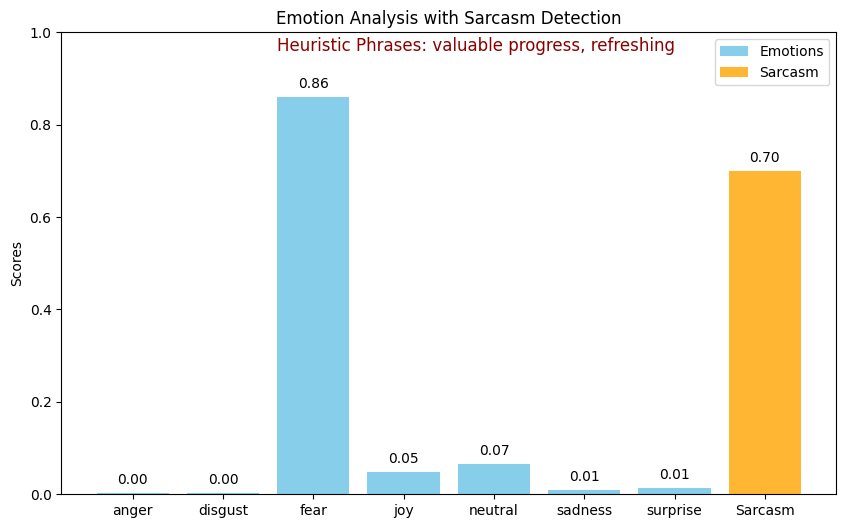

In [26]:
# 8. Main Workflow
def email_analysis_workflow(email_content):
    """Complete workflow for analyzing and improving email content."""
    # Tokenize and analyze sentences
    sentences = tokenize_email(email_content)
    sentiment_results = analyze_sentences(sentences)
    sarcasm_results = [detect_sarcasm_with_heuristics(sentence) for sentence in sentences]

    # Generate restructuring suggestions
    suggestions = suggest_restructuring(sentences, sentiment_results, sarcasm_results)

    # Display suggestions
    print("Restructuring Suggestions:")
    for sentence, suggestion in suggestions:
        print(f"- {sentence}\n  Suggestion: {suggestion}\n")

    # Extract actionable items
    actionable_items = extract_actionable_items(email_content)
    print("\nActionable Items:")
    for item in actionable_items:
        print(f"- {item}")

    # Emotions and sarcasm visualization
    emotions_result = emotion_detection(email_content)
    sarcasm_result = detect_sarcasm_with_heuristics(email_content)
    visualize_receiver_dashboard(emotions_result, sarcasm_result)



# Test Email
email_content = """
Dear [Manager’s Name],
Thank you so much for organizing yesterday’s meeting. It was truly impressive to see how much time we spent reviewing
the same points as last week without reaching any new conclusions. I appreciate the opportunity to listen to everyone’s
thoughts – again – on issues we’ve already discussed multiple times. It’s always refreshing to attend meetings where
decisions are avoided, and everyone leaves feeling as uncertain as they did beforehand. I look forward to the next one,
where I’m sure we’ll make equally valuable progress.
Best regards,
[Your Name]
"""

# Run the Workflow
print("\nDisplay Graph of Emotional Analysis and Sarcasm Detection:")
email_analysis_workflow(email_content)


## Implement Receiver side problematic and sarcasm detection


### Emotions and Sarcasm Dashboard

## Provide recipients with a clear visual representation of the email's emotional tone and sarcasm level.

In [27]:
def visualize_receiver_dashboard(emotions_result, sarcasm_result):
    """Displays a dashboard showing the detected emotions and sarcasm score."""
    import matplotlib.pyplot as plt

    # Extract emotion data
    emotions = {emotion['label']: emotion['score'] for emotion in emotions_result[0]}
    sarcasm_score = sarcasm_result['score']
    heuristic_phrases = sarcasm_result['heuristic_phrases']

    # Create bar chart for emotions
    plt.figure(figsize=(10, 6))
    emotion_names = list(emotions.keys())
    emotion_values = list(emotions.values())
    bars = plt.bar(emotion_names, emotion_values, color='skyblue', label='Emotions')

    # Add sarcasm as a separate bar
    plt.bar('Sarcasm', sarcasm_score, color='orange', label='Sarcasm', alpha=0.8)

    # Annotate bars
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{bar.get_height():.2f}', ha='center', fontsize=10)

    # Annotate sarcasm bar
    plt.text(len(emotion_names), sarcasm_score + 0.02, f'{sarcasm_score:.2f}', ha='center', fontsize=10)

    # Display heuristic phrases
    if heuristic_phrases:
        plt.text(len(emotions) - 1, max(emotion_values) + 0.1, f"Heuristic Phrases: {', '.join(heuristic_phrases)}",
                 fontsize=12, color='darkred', ha='right')

    # Customize plot
    plt.title('Receiver Dashboard: Emotions and Sarcasm')
    plt.ylabel('Scores')
    plt.ylim(0, 1)
    plt.legend()
    plt.show()


### 2. Flagging Ambiguous or Sarcastic Sections

## Highlight potentially ambiguous or sarcastic sentences to help recipients interpret intent.
Implementation:

Use the sarcasm detection output to flag sentences containing sarcasm and display potential interpretations.

In [28]:
def highlight_ambiguous_sections(sentences, sarcasm_results, sarcasm_threshold=0.7):
    """Highlights sentences that are ambiguous or sarcastic."""
    print("Ambiguous/Sarcastic Sections:")
    for i, sentence in enumerate(sentences):
        sarcasm = sarcasm_results[i]
        if sarcasm['label'] == "SARCASM" and sarcasm['score'] > sarcasm_threshold:
            heuristic_phrases = sarcasm['heuristic_phrases']
            phrases_text = f"({', '.join(heuristic_phrases)})" if heuristic_phrases else ""
            print(f"- {sentence.strip()} {phrases_text}")


### 3. Extracting Actionable Items
## Purpose:

##Highlight actionable items (e.g., tasks, deadlines) from the email content.
Implementation:

Search for specific phrases or keywords associated with tasks and deadlines.

In [29]:
def extract_actionable_items(email_content):
    """Extracts actionable items from email using rule-based keyword detection."""
    action_phrases = ["next steps", "action required", "please respond by", "deadline", "to do"]
    sentences = tokenize_email(email_content)
    actions = [sentence for sentence in sentences if any(phrase in sentence.lower() for phrase in action_phrases)]
    return actions

def display_actionable_items(actionable_items):
    """Displays actionable items for the receiver."""
    if not actionable_items:
        print("\nNo actionable items detected.")
    else:
        print("\nActionable Items:")
        for item in actionable_items:
            print(f"- {item.strip()}")


### 4. Receiver Workflow

## Integrate all the receiver-side solutions into a single workflow.

Ambiguous/Sarcastic Sections:

No actionable items detected.


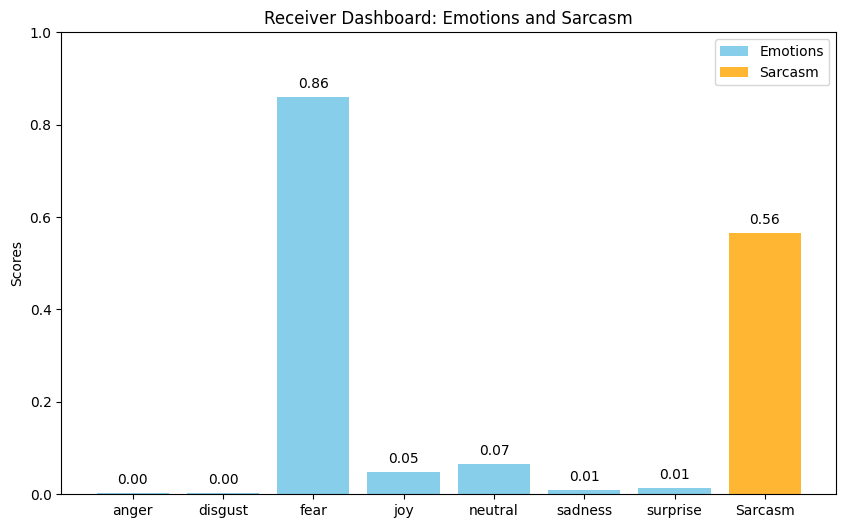

In [30]:
def receiver_analysis_workflow(email_content):
    """Workflow for receiver-side analysis."""
    # Tokenize email
    sentences = tokenize_email(email_content)

    # Sarcasm analysis
    sarcasm_results = [detect_sarcasm_with_heuristics(sentence) for sentence in sentences]

    # Emotion analysis
    emotions_result = emotion_detection(email_content)

    # Flag ambiguous sections
    highlight_ambiguous_sections(sentences, sarcasm_results)

    # Extract actionable items
    actionable_items = extract_actionable_items(email_content)
    display_actionable_items(actionable_items)

    # Visualize emotions and sarcasm
    visualize_receiver_dashboard(emotions_result, sarcasm_results[-1])  # Pass final sarcasm result for summary


# Test Email Content
email_content = """
Dear [Manager’s Name],
Thank you so much for organizing yesterday’s meeting. It was truly impressive to see how much time we spent reviewing
the same points as last week without reaching any new conclusions. I appreciate the opportunity to listen to everyone’s
thoughts – again – on issues we’ve already discussed multiple times. It’s always refreshing to attend meetings where
decisions are avoided, and everyone leaves feeling as uncertain as they did beforehand. I look forward to the next one,
where I’m sure we’ll make equally valuable progress.
Best regards,
[Your Name]
"""

# Run Receiver Workflow
receiver_analysis_workflow(email_content)



### 1. Tone Evolution Over Time
## Purpose:
Track the tone of emails over time to identify patterns, such as whether communication is becoming more negative or positive.

###Implementation:
 Aggregate sentiment scores (e.g., compound from VADER or combined sentiment) across multiple emails and plot the trend.

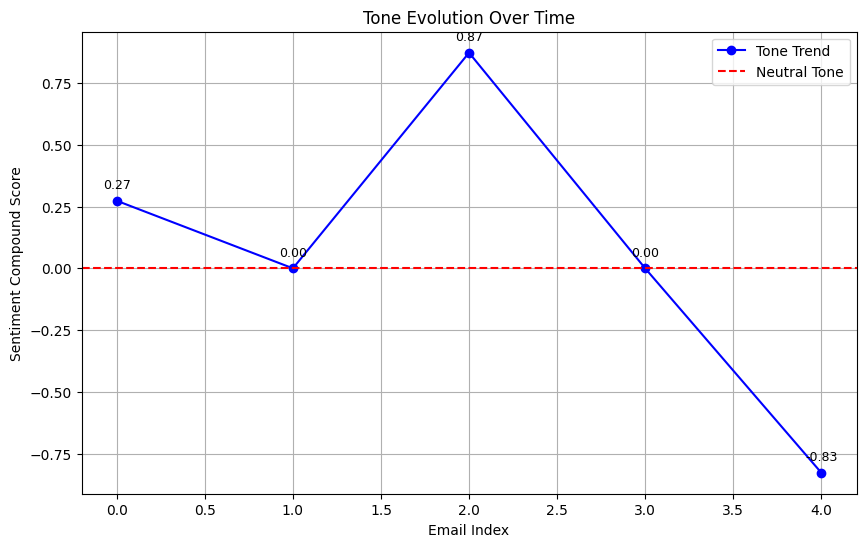

In [31]:
# Step 1: Define your emails
email_contents = [
    "The project is going well, and we are on track to meet the deadline.",
    "I'm concerned about the delay in completing the tasks. Please update me on the status.",
    "Great job on the recent update! The progress looks promising.",
    "There are still unresolved issues that need attention before we proceed further.",
    "How in this world does everybody suck so bad at accomplishing even THE MOST BASIC of tasks?!"
]


# Use this for file input containing emails
#with open("emails.txt", "r") as file:
    #email_contents = file.readlines()  # Each line represents one email


# Step 2: Define the tone trend analysis function
import numpy as np
import matplotlib.pyplot as plt

def tone_trend_analysis(email_contents):
    """Tracks tone evolution over time based on sentiment analysis, with annotations."""
    tones = []
    for content in email_contents:
        sentiment_result = sia.polarity_scores(content)  # VADER Sentiment Analysis
        tones.append(sentiment_result['compound'])

    # Calculate mean and standard deviation for anomaly detection
    mean_tone = np.mean(tones)
    std_tone = np.std(tones)

    # Plot the tone trend
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(tones)), tones, marker='o', linestyle='-', color='blue', label='Tone Trend')
    plt.axhline(0, color='red', linestyle='--', label='Neutral Tone')

    # Annotate points
    for i, tone in enumerate(tones):
        plt.text(i, tone + 0.05, f"{tone:.2f}", ha='center', fontsize=9)
        # Highlight anomalies
        if abs(tone - mean_tone) > 2 * std_tone:  # Z-score > 2
            plt.scatter(i, tone, color='orange', s=100, label='Anomaly' if i == 0 else "")

    # Customize plot
    plt.title('Tone Evolution Over Time')
    plt.xlabel('Email Index')
    plt.ylabel('Sentiment Compound Score')
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 3: Call the function
tone_trend_analysis(email_contents)


### 2. Contextual Anomalies in Tone
##Purpose:
Flag emails where the tone significantly deviates from prior communications to highlight potential issues.
##Implementation:
Calculate z-scores for sentiment compound scores and flag emails with high deviations.

In [32]:
import numpy as np

def detect_anomalies(email_contents):
    """Detects emails with anomalous tone based on prior communications."""
    tones = [sia.polarity_scores(content)['compound'] for content in email_contents]
    mean_tone = np.mean(tones)
    std_tone = np.std(tones)

    anomalies = []
    for i, tone in enumerate(tones):
        z_score = (tone - mean_tone) / std_tone
        if abs(z_score) > 2:  # Flagging if z-score > 2
            anomalies.append((i, email_contents[i], tone))

    # Display anomalies
    print("Anomalous Emails:")
    if anomalies:
        for index, content, tone in anomalies:
            print(f"- Email {index + 1} (Tone: {tone:.2f}): {content.strip()[:100]}...")
    else:
        print("No anomalies detected.")


### 3. Receiver-Specific Insights
##Purpose:
Adjust the email tone interpretation based on the recipient's mood, communication style, or prior preferences.
##Implementation:
Allow recipients to input their mood or preferences and adjust the tone analysis output accordingly.

In [33]:
def adjust_tone_for_recipient(sentiment_score, recipient_mood="neutral"):
    """Adjusts tone interpretation based on recipient mood."""
    adjustment_factors = {
        "positive": 0.1,  # Boost positivity if recipient is in a good mood
        "neutral": 0.0,   # No adjustment
        "negative": -0.1  # Reduce positivity if recipient is in a bad mood
    }

    adjusted_score = sentiment_score + adjustment_factors.get(recipient_mood, 0.0)
    interpretation = "Positive" if adjusted_score > 0 else "Negative" if adjusted_score < 0 else "Neutral"
    return adjusted_score, interpretation

recipient_mood = "negative"  # Example input from the recipient
sentiment_score = sia.polarity_scores(email_content)['compound']
adjusted_score, interpretation = adjust_tone_for_recipient(sentiment_score, recipient_mood)
print(f"Adjusted Sentiment Score: {adjusted_score:.2f} ({interpretation})")



Adjusted Sentiment Score: 0.87 (Positive)


### 4. Keyword-Based Intent Analysis
##Purpose:
Detect specific intents (e.g., inquiry, complaint, request) in the email for better categorization and response.
##Implementation:
Use rule-based keyword matching to classify intent.

In [34]:
def detect_email_intent(email_content):
    """Classifies the email's intent based on detected keywords."""
    intents = {
        "inquiry": ["question", "inquire", "could you clarify", "want to know"],
        "complaint": ["issue", "problem", "not satisfied", "concern"],
        "request": ["please", "could you", "kindly", "would you"],
    }

    detected_intents = []
    for intent, keywords in intents.items():
        if any(keyword in email_content.lower() for keyword in keywords):
            detected_intents.append(intent)

    return detected_intents

# Example Usage
intents = detect_email_intent(email_content)
print(f"Detected Intents: {', '.join(intents) if intents else 'None'}")


Detected Intents: complaint


###5. Predict Response Priority
##Purpose:

Suggest a priority level for responding to the email based on sentiment, tone, and intent.
##Implementation:

Combine sentiment analysis, intent detection, and action phrases to assign a priority score.

In [35]:
def predict_response_priority(email_content):
    """Predicts response priority for the email."""
    sentiment = sia.polarity_scores(email_content)['compound']
    intents = detect_email_intent(email_content)
    actionable_items = extract_actionable_items(email_content)

    # Assign priority
    priority_score = 0
    if sentiment < 0:  # Negative sentiment increases priority
        priority_score += 2
    if "complaint" in intents:  # Complaints have high priority
        priority_score += 3
    if actionable_items:  # Actionable items increase priority
        priority_score += 1

    # Map score to priority level
    if priority_score >= 5:
        return "High Priority"
    elif 2 <= priority_score < 5:
        return "Medium Priority"
    else:
        return "Low Priority"

# Example Usage
priority = predict_response_priority(email_content)
print(f"Response Priority: {priority}")


Response Priority: Medium Priority


###6. Tone and Sentiment Categorization
##Purpose:

Provide an overall categorization of the email based on tone and sentiment.
##Implementation:

Combine sentiment polarity and emotion scores into distinct categories (e.g., “Constructive Criticism,” “Compliment”).

In [36]:
def categorize_email_tone(sentiment_score, emotion_scores):
    """Categorizes email tone into distinct categories."""
    if sentiment_score > 0.5 and "joy" in emotion_scores:
        return "Compliment"
    elif sentiment_score < -0.5 and "anger" in emotion_scores:
        return "Complaint"
    elif sentiment_score < 0 and "sadness" in emotion_scores:
        return "Constructive Criticism"
    else:
        return "Neutral Communication"

# Example Usage
sentiment_score = sia.polarity_scores(email_content)['compound']
emotion_scores = {emotion['label']: emotion['score'] for emotion in emotion_detection(email_content)[0]}
tone_category = categorize_email_tone(sentiment_score, emotion_scores)
print(f"Tone Category: {tone_category}")


Tone Category: Compliment


# Sentence Expander

A receiver/sender solution that will take a simple sentence and expound upon it.
Making the input email more verbose and complex.

Expanding a basic sentence or idea into a more complex, detailed version can be achieved using locally hosted models and rule-based approaches. Below are steps to implement this for both sender and receiver solutions.

Implementation Overview
1. Key Approaches

    Rule-Based Approach:
        Use grammar rules and linguistic transformations to add complexity to sentences.
    Pre-Trained Language Models:
        Use a locally hosted transformer model, such as GPT-2, to expand sentences by predicting the next sequence of words or adding descriptive details.

## 1. Sender-Side Solution: Adding Complexity to Simplistic Sentences
Purpose:

Help the sender write more elaborate and descriptive sentences for better communication.
Implementation:

Step 1: Sentence Expansion Using GPT-2

Use GPT-2 to generate expanded versions of sentences. The model predicts the continuation of a sentence or adds descriptive details to its content.

In [37]:
from transformers import pipeline

# Load locally hosted GPT-2 model for text generation
def expand_sentence(sentence, max_length=100, num_return_sequences=1):
    """Expands a basic sentence into a more complex, detailed version."""
    generator = pipeline("text-generation", model="gpt2", device=-1)  # Use CPU
    expanded_sentences = generator(sentence, max_length=max_length, num_return_sequences=num_return_sequences)
    return [result['generated_text'] for result in expanded_sentences]

# Example Usage
basic_sentence = "The meeting was productive but I feel like we could have accomplished more."
expanded_sentences = expand_sentence(basic_sentence)
for expanded in expanded_sentences:
    print(f"Expanded Sentence: {expanded}")


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Expanded Sentence: The meeting was productive but I feel like we could have accomplished more. For the first step, we all have a personal bond that we feel will work for us as well. This is a long line of work; I'm looking forward to getting to know you better and more as you move forward into your twenties and thirties."


## 2. Sender-Side Solution: Enhancing Clarity by Expounding Ambiguous Sentences
Purpose:

Help the sender by expanding ambiguous or sarcastic sentences into clear, detailed versions for better interpretation.
Implementation:

Step 1: Identify Ambiguous or Sarcastic Sentences

Reuse the existing sarcasm detection and sentiment analysis functions to identify problematic sentences.

In [38]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

def tokenize_email(email_content):
    """Tokenizes the email content into sentences."""
    return sent_tokenize(email_content)


from transformers import pipeline

def detect_sarcasm_with_heuristics(email_content):
    """Detects sarcasm using a pre-trained Hugging Face model and heuristic methods."""
    sarcasm_pipeline = pipeline(
        "text-classification",
        model="mrm8488/t5-base-finetuned-sarcasm-twitter",
        device=-1  # Use CPU
    )
    sarcasm_result = sarcasm_pipeline(email_content)[0]

    # Simple heuristic rules
    sarcastic_phrases = [
        "valuable progress", "refreshing", "impressive time spent",
        "as expected", "great job repeating", "looking forward to similar results"
    ]
    detected_phrases = [phrase for phrase in email_content.lower().split() if phrase in sarcastic_phrases]
    sarcasm_confidence = 0.7 if detected_phrases else 0.3  # Adjust score
    heuristic_result = {
        "heuristic_detected": bool(detected_phrases),
        "phrases": detected_phrases,
        "score": sarcasm_confidence,
    }
    combined_score = max(sarcasm_result['score'], heuristic_result['score'])
    is_sarcastic = sarcasm_result['label'] == 'LABEL_1' or heuristic_result['heuristic_detected']

    return {
        "label": "SARCASM" if is_sarcastic else "NOT_SARCASM",
        "score": combined_score,
        "heuristic_phrases": heuristic_result['phrases']
    }

def identify_ambiguous_sentences(sentences, sarcasm_results, sarcasm_threshold=0.7):
    """Identifies ambiguous or sarcastic sentences."""
    ambiguous_sentences = []
    for i, sarcasm in enumerate(sarcasm_results):
        if sarcasm['label'] == "SARCASM" and sarcasm['score'] > sarcasm_threshold:
            ambiguous_sentences.append(sentences[i])
    return ambiguous_sentences


# Load locally hosted GPT-2 model for text generation
def expand_sentence(sentence, max_length=50, num_return_sequences=1):
    """Expands a basic sentence into a more complex, detailed version."""
    generator = pipeline("text-generation", model="gpt2", device=-1)  # Use CPU
    expanded_sentences = generator(sentence, max_length=max_length, num_return_sequences=num_return_sequences)
    return [result['generated_text'] for result in expanded_sentences]

def expand_ambiguous_sentences(ambiguous_sentences):
    """Expands ambiguous or sarcastic sentences to make them clearer."""
    expanded_sentences = []
    for sentence in ambiguous_sentences:
        expanded = expand_sentence(sentence, max_length=50)
        expanded_sentences.append(expanded[0])  # Take the first expanded result
    return expanded_sentences

def receiver_analysis_workflow(email_content):
    """Workflow for receiver-side analysis and ambiguous sentence expansion."""
    # Step 1: Tokenize email content into sentences
    sentences = tokenize_email(email_content)

    # Step 2: Analyze each sentence for sarcasm
    sarcasm_results = [detect_sarcasm_with_heuristics(sentence) for sentence in sentences]

    # Step 3: Highlight ambiguous sections
    ambiguous_sentences = identify_ambiguous_sentences(sentences, sarcasm_results)

    # Step 4: Expand ambiguous sentences
    expanded_sentences = expand_ambiguous_sentences(ambiguous_sentences)

    # Display expanded sentences
    print("\nExpanded Ambiguous Sentences:")
    for original, expanded in zip(ambiguous_sentences, expanded_sentences):
        print(f"Original: {original}")
        print(f"Expanded: {expanded}\n")

    # Optional: Add visualization or actionable items if needed
# Test Email Content
email_content = """
Dear [Manager’s Name],
Thank you so much for organizing yesterday’s meeting. It was truly impressive to see how much time we spent reviewing
the same points as last week without reaching any new conclusions. I appreciate the opportunity to listen to everyone’s
thoughts – again – on issues we’ve already discussed multiple times. It’s always refreshing to attend meetings where
decisions are avoided, and everyone leaves feeling as uncertain as they did beforehand. I look forward to the next one,
where I’m sure we’ll make equally valuable progress.
Best regards,
[Your Name]
"""

# Run Receiver Workflow
receiver_analysis_workflow(email_content)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Expanded Ambiguous Sentences:


# Method 4 - Integration of Text-To-Speech (TTS) and Computer Vision (CV)

Builds upon previous models in Method 2 to integrate TTS and CV to improve clarity of email inputs.

# Implementation of text-to-speech (TTS) functionality
## This example plays a text-to-speech voiceover to summarize the input email. Actual individual voiceover input is demonstrated in Method 2's email analysis.

Text-to-Speech (TTS) Feedback Integration

Purpose:
This feature enables the system to provide audio feedback based on the analyzed email and image data. The text-to-speech (TTS) engine converts textual insights into audible feedback, enhancing the user experience by summarizing sentiment, sarcasm, and image professionalism in a spoken format.

Implementation Details:

    Engine Used: pyttsx3
    A Python text-to-speech library capable of running offline and offering voice customization. It is lightweight and well-suited for notebook environments.

    Key Function:
        provide_audio_feedback: Converts the feedback string into audible speech.


        


In [39]:
# Import libraries, define functions
def analyze_email(email):
    # Your email analysis logic here
    # Placeholder for corrected email (Replace with actual analysis)
    corrected_email = "This is a placeholder for the corrected email."
    return {"corrected_email": corrected_email}  # Return a dictionary containing the corrected email

def plot_tone_trends(example_emails):
    # Your trend plotting logic here
    pass

# Analyze emails in the main logic section
email_content = """
Dear Team,
I hope this email finds you well. I wanted to express my gratitude for everyone’s hard work over the past few weeks. Your dedication and commitment have not gone unnoticed.
Let’s continue to push forward and ensure we meet our project milestones on time. Please let me know if there’s anything I can do to support you in your efforts.
Kind regards,
[Team Lead]
"""
results = analyze_email(email_content)
print("Corrected Email:\n", results["corrected_email"])
# Other analysis outputs...

# At the end of the file: Standalone TTS block
from gtts import gTTS  # Or use pyttsx3
import os

def text_to_speech_gtts(text, output_file="output.mp3"):
    """
    Convert text to speech using gTTS and save to an audio file.
    """
    try:
        tts = gTTS(text, lang='en')
        tts.save(output_file)
        print(f"Audio saved as {output_file}. You can play it now.")
    except Exception as e:
        print(f"Error in gTTS: {e}")

summary_text = """
Dear Team,
I hope this email finds you well. I wanted to express my gratitude for everyone’s hard work over the past few weeks. Your dedication and commitment have not gone unnoticed.
Let’s continue to push forward and ensure we meet our project milestones on time. Please let me know if there’s anything I can do to support you in your efforts.
Kind regards,
[Team Lead]
"""
text_to_speech_gtts(summary_text, "final_summary_audio.mp3")

Corrected Email:
 This is a placeholder for the corrected email.
Audio saved as final_summary_audio.mp3. You can play it now.


# Play the created audio file

In [40]:
# Play the generated audio file in the notebook
# The filename should be "final_summary_audio.mp3" based on your previous code
Audio("final_summary_audio.mp3", autoplay=True)

# Implementation of Computer Vision Aids

Image Analysis for Professionalism using resnet18

Purpose:
The image analysis module assesses the professionalism of an image attached to an email. It evaluates various attributes such as blurriness and alignment with predefined professional categories.

Implementation Details:

    Models Used:
        Pre-trained ResNet18 from PyTorch's torchvision.models.
            A convolutional neural network (CNN) designed for image classification tasks.
            It identifies high-level features from images and predicts classes such as "Professional" or "Casual."
    Blurriness Detection:
        The cv2.Laplacian method from OpenCV calculates the variance of the Laplacian, measuring image sharpness. Lower variance indicates blurriness.
        Deducts points from the professionalism score for blurry images.
    Key Functions:
        preprocess_image: Prepares the image for ResNet18 by resizing and converting it to a tensor.
        is_image_blurry: Evaluates the sharpness of the image.
        evaluate_professionalism: Combines predictions from the ResNet18 model and blurriness scores into a comprehensive professionalism score.

Outputs:

    Professionalism Score:
    A numerical value (0–100) quantifying the professionalism of the image.
    Class Label:
    The predicted category of the image (e.g., "Professional," "Casual," or "Unprofessional").
    Warning:
    A flag is raised if the score is below a threshold (e.g., 50), suggesting the image may not appear professional.

This feature ensures that attachments align with the professional tone of the email, contributing to overall communication quality.



In [41]:
# Helper Functions for Image Analysis
def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize for model input
        transforms.ToTensor(),  # Convert to Tensor
    ])
    return transform(image).unsqueeze(0)  # Add batch dimension

# def is_image_blurry(image_path, threshold=100):
#     image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#     laplacian_var = cv2.Laplacian(image, cv2.CV_64F).var()
#     return laplacian_var < threshold

def is_image_blurry(image_path, threshold=100):
    # Use PIL to handle formats OpenCV might not support directly
    if image_path.endswith(".webp"):
        image = Image.open(image_path).convert("RGB")
        image = np.array(image)  # Convert to NumPy array for OpenCV compatibility
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
    else:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    laplacian_var = cv2.Laplacian(image, cv2.CV_64F).var()
    return laplacian_var < threshold


def load_model():
    model = resnet18(pretrained=True)
    model.eval()  # Set to evaluation mode
    return model

def analyze_image_with_model(model, image_tensor):
    outputs = model(image_tensor)
    probabilities = torch.nn.functional.softmax(outputs[0], dim=0)
    return probabilities

def evaluate_professionalism(image_path):
    # Define class index mapping
    class_indices_for_professional = {
        0: "Professional",
        1: "Casual",
        2: "Unprofessional"
    }

    # Preprocess the image
    image_tensor = preprocess_image(image_path)
    is_blurry = is_image_blurry(image_path)

    # Load and analyze with model
    model = load_model()
    probabilities = analyze_image_with_model(model, image_tensor)
    predicted_class_index = probabilities.argmax().item()

    # Combine metrics
    professionalism_score = probabilities[predicted_class_index].item() * 100
    if is_blurry:
        professionalism_score -= 20  # Deduct points for blurry images

    # Ensure the predicted class index maps to a valid label
    professionalism_label = class_indices_for_professional.get(predicted_class_index, "Unknown")

    return {
        "class_label": professionalism_label,
        "professionalism_score": max(0, professionalism_score)  # Ensure score is non-negative
    }




## Process the email and visual integration and provide audio feedback

In [42]:
# Function to provide TTS feedback for images.
def provide_audio_feedback(feedback_text):
    engine = pyttsx3.init()
    engine.say(feedback_text)
    engine.runAndWait()

def process_email_and_image(email_text, image_path=None):
    # Step 1: Analyze email text
    email_analysis = analyze_email(email_text)

    # Extract results from email analysis
    corrected_email = email_analysis["corrected_email"]
    sentiment = email_analysis["bert_sentiment"]
    vader_scores = email_analysis["vader_tone_scores"]
    sarcasm_detected = email_analysis["sarcasm_result"]["detected"]
    readability_score = email_analysis["readability_score"]

    print("Corrected Email:", corrected_email)
    print("BERT Sentiment:", sentiment)
    print("VADER Scores:", vader_scores)
    print("Sarcasm Detected:", sarcasm_detected)
    print("Readability Score:", readability_score)

    # Step 2: Analyze image (if provided)
    if image_path:
        try:
            professionalism_result = evaluate_professionalism(image_path)
            professionalism_label = professionalism_result.get("class_label", "Unknown")
            professionalism_score = professionalism_result.get("professionalism_score", 0)

            print("\nImage Analysis:")
            print(f"Class Label: {professionalism_label}")
            print(f"Professionalism Score: {professionalism_score}")

            if professionalism_score < 50:
                print("Warning: The image may not appear professional.")
        except Exception as e:
            print(f"Image analysis failed: {e}")



## Reinitiailize the email analysis.

Re-uses the initial email analysis from Method 2 (except for the text-to-speech feedback conversion) in order to prepare a list of emails for image analysis.
Most of the code is the same as Method 2.

In [43]:
# Check for incorrect Grammar in input email
def grammar_check(email_content):
    tool = language_tool_python.LanguageTool('en-US')
    matches = tool.check(email_content)
    corrected_email = language_tool_python.utils.correct(email_content, matches)
    return corrected_email, matches

"""### Hugging Face Transformers Emotion Detection

This function uses a pre-trained transformer model to detect emotions in the email. Key steps include:

1. **Emotion Classification**:
   - The model assigns scores to different emotions such as happiness, sadness, anger, etc.
2. **Output**:
   - Returns a list of emotions with their corresponding confidence scores.

This provides a deeper understanding of the emotional tone conveyed by the email.

"""

# Emotion Detection using Hugging Face Transformers
def emotion_detection(email_content):
    # Use a pre-trained emotion detection model
    emotion_pipeline = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)
    emotions = emotion_pipeline(email_content)
    return emotions

"""## gTTs Text-to-Speech integration
Function to convert text to speech and save it to a file for use in the notebook.
"""

# Define the text_to_speech_gtts function
def text_to_speech_gtts(text, filename):
    """Converts text to speech using gTTS and saves to an MP3 file."""
    tts = gTTS(text=text, lang='en')  # 'en' for English
    tts.save(filename)

"""### VADER Sentiment Analysis

The `VADER` tool performs sentiment analysis on the email content. Key aspects:

1. **Sentiment Scores**:
   - `neg`: Negative sentiment score.
   - `neu`: Neutral sentiment score.
   - `pos`: Positive sentiment score.
   - `compound`: A normalized score summarizing the overall sentiment.
2. **Output**:
   - Provides an overall sentiment profile for the email.

This function captures both polarity and intensity of sentiment using a lexicon-based approach.

"""

# VADER Sentiment Analysis
def sentiment_analysis_vader(email_content):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(email_content)

"""

### BERT Sentiment Analysis

This function utilizes the Hugging Face `BERT` model for advanced sentiment analysis. Key points:

1. **Tokenization**:
   - Converts the email text into tokens that the BERT model can process.
2. **Sentiment Prediction**:
   - Provides probabilities for `Positive`, `Neutral`, and `Negative` sentiments.
3. **Output**:
   - Returns a dictionary mapping each sentiment label to its respective score.

This adds contextual depth to sentiment analysis.
"""

# BERT Sentiment Analysis
def sentiment_analysis(email_content):
    sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
    sentiment = sentiment_pipeline(email_content)
    return sentiment

"""### Heuristic Sarcasm Detection

This function detects sarcasm in the email using rule-based heuristics. Key steps:

1. **Phrase Detection**:
   - Searches for predefined sarcastic phrases (e.g., "valuable progress").
2. **Confidence Assignment**:
   - Assigns a higher confidence score if sarcastic phrases are detected.
3. **Output**:
   - Indicates whether sarcasm is detected and lists the phrases contributing to it.

It complements the model-based sarcasm detection by using human-crafted rules.

"""

# Heuristic Function to use rule-based approach to check for slightly sarcastic understones in emails
def heuristic_sarcasm_check(email_content):
    sarcastic_phrases = [
        "valuable progress",
        "refreshing",
        "impressive time spent",
        "as expected",
        "great job repeating",
        "looking forward to similar results"
    ]

    # Check for any sarcastic phrase in the email
    detected_phrases = [phrase for phrase in sarcastic_phrases if phrase in email_content.lower()]
    sarcasm_confidence = 0.7 if detected_phrases else 0.3  # Assign higher confidence if phrases are found
    return {
        "heuristic_detected": bool(detected_phrases),
        "phrases": detected_phrases,
        "score": sarcasm_confidence
    }

"""### Hugging Face Sarcasm Detection

This function leverages a pre-trained Hugging Face model for sarcasm detection:

1. **Model Prediction**:
   - Classifies the email as `SARCASM` or `NOT_SARCASM`.
2. **Heuristic Integration**:
   - Combines model output with heuristic results for enhanced accuracy.
3. **Output**:
   - Returns the sarcasm label, score, and heuristic phrases.

It provides a robust mechanism for sarcasm detection by combining model and rule-based approaches.
"""

# Hugging Face Sarcasm Detection with built in heuristics
def detect_sarcasm_with_heuristics(email_content):
    # First, use the sarcasm model
    sarcasm_result = sarcasm_pipeline(email_content)[0]

    # Run heuristic sarcasm detection
    heuristic_result = heuristic_sarcasm_check(email_content)

    # Combine results: take the max score if heuristics detect sarcasm
    combined_score = max(sarcasm_result['score'], heuristic_result['score'])
    is_sarcastic = sarcasm_result['label'] == 'LABEL_1' or heuristic_result['heuristic_detected']

    return {
        "label": "SARCASM" if is_sarcastic else "NOT_SARCASM",
        "score": combined_score,
        "heuristic_phrases": heuristic_result['phrases']
    }

"""### BART Summarization of Input Email

This function summarizes the email content using the `BART` model:

1. **Summarization**:
   - Compresses the content to highlight key points.
2. **Output**:
   - Provides a concise summary of the email.

This helps in quickly understanding the main ideas without reading the entire email.

"""

# Bart Summarization
def summarize_email(email_content):
    summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
    summary = summarizer(email_content, max_length=30, min_length=10, do_sample=False)
    return summary[0]['summary_text']

"""### Readability Analysis

This function evaluates the readability of the email using `textstat`:

1. **Readability Score**:
   - Computes the Flesch Reading Ease score.
   - Higher scores indicate easier-to-read content.
2. **Output**:
   - Returns a numerical readability score.

This helps gauge how easy the email is to read and comprehend based upon the Flesch Reading Ease Score. The scores symbolize the grade level needed to read something. With a higher score being easier to read.

(Source: https://www.morainepark.edu/help/what-flesch-reading-ease-score-should-my-content-have/)

Scores:

100 - 90 = 5th grade

90 - 80 = 6th grade

80 - 70 = 7th grade

70 - 60 = 8th and 9th grade

60 - 50 = 10th to 12th grade

50 - 30 = College

30 - 10 = College Graduate

10 - 0 = Professional

"""

# Calculate the Flesch Reading Ease Score of email input
def readability_analysis(email_content):
    score = textstat.flesch_reading_ease(email_content)
    return score

"""
### Combined Sentiment Scores from BERT and VADER

This function combines sentiment results from BERT and VADER for a balanced analysis:

1. **Score Normalization**:
   - Adjusts the VADER compound score to a 0–1 range.
2. **Weighted Combination**:
   - Calculates a weighted average of sentiment scores from both models.
3. **Final Sentiment**:
   - Determines if the overall sentiment is Positive or Negative.

This approach leverages the strengths of both contextual and lexicon-based models."""

def combine_sentiment_scores(bert_sentiment, vader_tone_scores, bert_weight=0.6, vader_weight=0.4):
    # Normalize VADER compound score to [0, 1]
    vader_score_normalized = (vader_tone_scores['compound'] + 1) / 2  # Range [0, 1]

    # Safely extract BERT positive/negative probabilities with default values if missing
    bert_positive = next((score['score'] for score in bert_sentiment if score['label'].upper() == "POSITIVE"), 0.5)
    bert_negative = next((score['score'] for score in bert_sentiment if score['label'].upper() == "NEGATIVE"), 0.5)

    # Combined sentiment score (weighted average)
    combined_positive = bert_weight * bert_positive + vader_weight * vader_score_normalized
    combined_negative = bert_weight * bert_negative + vader_weight * (1 - vader_score_normalized)

    # Determine final sentiment based on the combined scores
    final_sentiment = "Positive" if combined_positive > combined_negative else "Negative"

    return {
        "combined_positive": combined_positive,
        "combined_negative": combined_negative,
        "final_sentiment": final_sentiment
    }

"""### Adjust Combined Sentiment for Sarcasm

This function adjusts sentiment scores based on sarcasm detection:

1. **Positive Sentiment Reduction**:
   - Reduces positive sentiment if sarcasm is detected.
2. **Negative Sentiment Boost**:
   - Increases negative sentiment to reflect sarcastic undertones.
3. **Output**:
   - Returns adjusted sentiment scores and flags if sarcasm adjustments were applied.

It ensures sentiment analysis accounts for sarcastic tones.

"""

# 9. Adjust Combined Sentiment for Sarcasm
def adjust_for_sarcasm(combined_sentiment, sarcasm_result):
    if sarcasm_result['label'] == 'SARCASM' and sarcasm_result['score'] > 0.6:
        # Adjust sentiment scores to reflect sarcasm
        combined_sentiment['combined_positive'] *= 0.5  # Reduce positive sentiment by 50%
        combined_sentiment['combined_negative'] += 0.3  # Increase negative sentiment
        if combined_sentiment['combined_negative'] > 1:
            combined_sentiment['combined_negative'] = 1  # Cap at 1

        combined_sentiment['final_sentiment'] = "Negative"
        combined_sentiment['sarcasm_adjusted'] = True
    else:
        combined_sentiment['sarcasm_adjusted'] = False

    return combined_sentiment

In [44]:
def analyze_email(email_content, image_path=None):
    # Grammar and spelling correction
    corrected_email, grammar_issues = grammar_check(email_content)

    # Emotion detection
    emotions = emotion_detection(corrected_email)

    # Sentiment analysis (BERT and VADER)
    vader_tone_scores = sentiment_analysis_vader(corrected_email)
    bert_sentiment = sentiment_analysis(corrected_email)

    # Sarcasm detection
    sarcasm_result = detect_sarcasm_with_heuristics(corrected_email)

    # Combine BERT and VADER sentiment scores
    combined_sentiment = combine_sentiment_scores(bert_sentiment, vader_tone_scores)
    # Adjust for Sarcasm Evaluation
    combined_sentiment = adjust_for_sarcasm(combined_sentiment, sarcasm_result)

    # Readability score
    readability_score = readability_analysis(corrected_email)

    # Email summarization
    summary = summarize_email(corrected_email)

    # Image analysis (if an image path is provided)
    image_analysis_result = None
    if image_path:
        try:
            professionalism_result = evaluate_professionalism(image_path)
            professionalism_score = professionalism_result["professionalism_score"]  # Extract score
            image_analysis_result = {
                "professionalism_score": professionalism_score,
                "warning": "The image may not appear professional." if professionalism_score < 50 else None,
            }
        except Exception as e:
            image_analysis_result = {"error": f"Image analysis failed: {e}"}


    return {
        "corrected_email": corrected_email,
        "grammar_issues": grammar_issues,
        "emotions": emotions,
        "bert_sentiment": bert_sentiment,
        "vader_tone_scores": vader_tone_scores,
        "sarcasm_result": sarcasm_result,
        "combined_sentiment": combined_sentiment,
        "readability_score": readability_score,
        "summary": summary,
        "image_analysis": image_analysis_result,  # Add image analysis results here
    }



## Analyze Email Content and Professionalism of Photos

Photo Sources:
Shrek.png = https://www.reddit.com/r/MemeRestoration/comments/u56bu0/shreks_funny_face_1000x1000/
bigstock-Group-Of-Professional-Business-349068817.webp = https://smallbizclub.com/wp-content/uploads/2020/06/bigstock-Group-Of-Professional-Business-349068817.jpg


In [45]:
# Example emails and images
email_list = [
    {
        "content": "Dear Team, Thank you for the hard work and dedication on the recent project. Everyone has done a great job and your efforts have not gone unnoticed!",
        "image_path": "/content/Shrek.png",  # Replace with actual image path
    },
    {
        "content": "Dear Manager, I wanted to highlight some concerns regarding the recent changes in the workflow. Let's discuss this further.",
        "image_path": "/content/bigstock-Group-Of-Professional-Business-349068817.webp",  # Replace with another image path
    },
]

# Process each email and its corresponding image
for idx, email_data in enumerate(email_list, start=1):
    email_content = email_data["content"]
    image_path = email_data.get("image_path")  # Get image path or None if not provided

    print(f"\n--- Processing Email {idx} ---")

    # Analyze email and image
    results = analyze_email(email_content, image_path)

    # Display the results
    print("\nCorrected Email:\n", results["corrected_email"])
    print("\nGrammar Issues:\n", results["grammar_issues"])
    print("\nEmotions:\n")
    for emotion in results["emotions"][0]:
        print(f"{emotion['label']}: {emotion['score']:.2f}")
    print("\nBERT Sentiment:\n", results["bert_sentiment"])
    print("\nVADER Tone Scores:\n", results["vader_tone_scores"])
    print("\nSarcasm Detection Result:\n", results["sarcasm_result"])
    print("\nCombined Sentiment:\n", results["combined_sentiment"])
    print("\nReadability Score:\n", results["readability_score"])
    print("\nSummary:\n", results["summary"])

    # Check image analysis
    if results["image_analysis"]:
        print("\nImage Analysis:\n", results["image_analysis"])
        if results["image_analysis"].get("warning"):
            print("Warning:", results["image_analysis"]["warning"])



--- Processing Email 1 ---


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 118MB/s]



Corrected Email:
 Dear Team, Thank you for the hard work and dedication on the recent project. Everyone has done a great job and your efforts have not gone unnoticed!

Grammar Issues:
 []

Emotions:

anger: 0.02
disgust: 0.00
fear: 0.00
joy: 0.74
neutral: 0.12
sadness: 0.01
surprise: 0.12

BERT Sentiment:
 [{'label': 'POSITIVE', 'score': 0.999860405921936}]

VADER Tone Scores:
 {'neg': 0.043, 'neu': 0.669, 'pos': 0.289, 'compound': 0.8439}

Sarcasm Detection Result:
 {'label': 'SARCASM', 'score': 0.5610474348068237, 'heuristic_phrases': []}

Combined Sentiment:
 {'combined_positive': 0.9686962435531616, 'combined_negative': 0.33121999999999996, 'final_sentiment': 'Positive', 'sarcasm_adjusted': False}

Readability Score:
 83.15

Summary:
 "Everyone has done a great job and your efforts have not gone unnoticed!" says the team. "Thank you for the hard work

Image Analysis:
 {'professionalism_score': 19.924582540988922, 'warning': 'The image may not appear professional.'}

--- Processing

Your max_length is set to 30, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)



Corrected Email:
 Dear Manager, I wanted to highlight some concerns regarding the recent changes in the workflow. Let's discuss this further.

Grammar Issues:
 []

Emotions:

anger: 0.05
disgust: 0.01
fear: 0.33
joy: 0.01
neutral: 0.46
sadness: 0.13
surprise: 0.02

BERT Sentiment:
 [{'label': 'POSITIVE', 'score': 0.9949207901954651}]

VADER Tone Scores:
 {'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.6124}

Sarcasm Detection Result:
 {'label': 'SARCASM', 'score': 0.5697226524353027, 'heuristic_phrases': []}

Combined Sentiment:
 {'combined_positive': 0.919432474117279, 'combined_negative': 0.37751999999999997, 'final_sentiment': 'Positive', 'sarcasm_adjusted': False}

Readability Score:
 61.83

Summary:
 I wanted to highlight some concerns regarding the recent changes in the workflow. Let's discuss this further. Dear Manager, I want to highlight

Image Analysis:
 {'professionalism_score': 65.36768078804016, 'warning': None}
